# Movies Data Exploration


![](https://e0.pxfuel.com/wallpapers/442/396/desktop-wallpaper-film-posters-collage-movies-resolution.jpg)

Welcome to the fascinating world of movies! From gripping dramas to hilarious comedies, heartwarming romances to thrilling action-packed adventures, the realm of cinema has captivated audiences for over a century. In this exploratory data analysis project, we dive deep into the mesmerizing world of movies to uncover insights and patterns hidden within the vast sea of data.

Movies have always held a special place in our hearts, transporting us to different eras, cultures, and dimensions. They evoke emotions, challenge our perspectives, and provide a source of entertainment that can be enjoyed by people from all walks of life. However, behind the magic of the silver screen lies a wealth of data waiting to be explored.

Through this project, we aim to unravel the secrets of the film industry by analyzing a comprehensive dataset that encompasses various aspects of movies. We will delve into the realms of genres, box office revenues, ratings, release dates, and much more. By extracting meaningful insights from this data, we can gain a better understanding of the factors that contribute to a movie's success and popularity.


**Methodology**                                                                                                                 
The following steps will be taken to perforn this Exploratory Data Analysis.
1. Data cleaning:We will deal with duplicate entries,missing values, inconsistent data, wrong data types etc
2. Non-graphical analysis:variables,basic metrics ,data types.
3. Exploratory Data Analysis and Visualizatation: Analysis of trends and patterns with charts, plots etc
4. Asking and Answering Questions
5. Inferences and Conclusions

**About the dataset:**

The Movies Dataset is a highly popular and valuable collection of movie-related data widely employed for research, analysis, and machine learning purposes. It boasts an extensive range of information covering various aspects of movies, including comprehensive details about the cast, crew, plot summaries, ratings, genres, release dates, and more.
Derived from multiple sources, notably IMDb (Internet Movie Database), this dataset has undergone meticulous preprocessing and consolidation, resulting in a well-structured format that enhances its usability. Its wealth of data points empowers researchers and developers to explore and analyze diverse facets of movies, unravel patterns, and extract insights.                          
The original dataset can be downloaded from the link:-https://www.kaggle.com/datasets/ashishkumarjayswal/movies-updated-data/download?datasetVersionNumber=1


## Downloading the Dataset

Now, there are three ways of downloading the dataset:

- importing urllib.request module and using it's urlretrieve function
- downloading the dataset directly from link and then uploading on Jupyter files section manually
- importing helper library opendatasets and using it's download function

**Downloading using opendatasets:**

In [3]:
!pip install jovian opendatasets --upgrade --quiet


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
dataset_url='https://www.kaggle.com/datasets/danielgrijalvas/movies/download?datasetVersionNumber=2'

In [5]:
import opendatasets as od 
od.download(dataset_url)

Skipping, found downloaded files in ".\movies" (use force=True to force download)


- The dataset has been downloaded and extracted successfully.

In [6]:
data_dir='movies'

In [7]:
import os
os.listdir(data_dir)

['movies.csv']

## Data Understanding and Cleaning

It is not possible to analyse a dirty data and get meaningfull insights from it so first we need to clean the data, remove the inconsistencies, duplicate data, deal with missing values etc. With the help of Pandas,we will efficiently prepare your data for analysis by addressing common data quality issues.Also we will understand the data its nature and a overlook of it.

**Loading the Data**                                                                                                             
We will import the required libraries and then use pandas to load the data from csv file to a pandas dataframe.

In [8]:
import numpy as np
import pandas as pd

In [9]:
movies_df=pd.read_csv('movies.csv')
movies_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [10]:
movies_df.shape

(7668, 15)

In [11]:
movies_df.sample(15)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
4682,Munich,R,Action,2005,"January 6, 2006 (United States)",7.5,216000.0,Steven Spielberg,Tony Kushner,Eric Bana,United States,70000000.0,130982129.0,Dreamworks Pictures,164.0
5391,Passengers,PG-13,Romance,2008,"September 26, 2008 (Spain)",5.9,35000.0,Rodrigo García,Ronnie Christensen,Anne Hathaway,United States,25000000.0,5798974.0,TriStar Pictures,93.0
2202,Into the West,PG,Adventure,1992,"September 17, 1993 (United States)",7.0,2800.0,Mike Newell,Jim Sheridan,Gabriel Byrne,Ireland,NaN,4790801.0,Channel Four Films,97.0
2120,Gladiator,R,Action,1992,"March 6, 1992 (United States)",6.5,8500.0,Rowdy Herrington,Djordje Milicevic,James Marshall,United States,20000000.0,9223441.0,Columbia Pictures,101.0
6224,Vamps,PG-13,Comedy,2012,"November 2, 2012 (United States)",5.2,9700.0,Amy Heckerling,Amy Heckerling,Alicia Silverstone,United States,16000000.0,92748.0,Lucky Monkey Pictures,92.0
4133,The Four Feathers,PG-13,Action,2002,"September 20, 2002 (United States)",6.5,33000.0,Shekhar Kapur,A.E.W. Mason,Heath Ledger,United Kingdom,35000000.0,29882645.0,Paramount Pictures,132.0
933,Club Paradise,PG-13,Comedy,1986,"July 11, 1986 (United States)",5.1,5900.0,Harold Ramis,Harry Shearer,Robin Williams,United States,15000000.0,12308521.0,Warner Bros.,96.0
1517,Next of Kin,R,Action,1989,"October 20, 1989 (United States)",5.8,9700.0,John Irvin,Michael Jenning,Patrick Swayze,United States,12000000.0,15942628.0,Lorimar Film Entertainment,108.0
439,Heat and Dust,R,Drama,1983,January 1983 (United Kingdom),6.6,1600.0,James Ivory,Ruth Prawer Jhabvala,Julie Christie,United Kingdom,NaN,1772889.0,Merchant Ivory Productions,130.0
721,Secret Admirer,R,Comedy,1985,"June 14, 1985 (United States)",6.6,6600.0,David Greenwalt,Jim Kouf,C. Thomas Howell,United States,NaN,8622757.0,Orion Pictures,90.0


**Errors that need to be corrected**
- There are many 0s in the budget but the budget of movie can't be zero.
- There are some null values so they won't be usefull for the analysis.

In [12]:
movies_df.replace(to_replace=0,value='NaN',inplace=True)

- This function will create all the 0 values to NaN then we can simply count NaN values and decide how to resolve.

**Checking for null values**

In [13]:
movies_df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

- The null values will hamper our results so we will remove them with the help of dropna function to clean our data.

In [14]:
movies_df.dropna(inplace=True)

In [15]:
movies_df.shape

(5421, 15)

- The NaN values has been sucessfully removed and the dataframe have all the valid values.

In [16]:
movies_df.drop_duplicates().shape

(5421, 15)

- The drop_duplicate function is used to remove the duplicates values from the dataframe.But the number of rows are still the same which indicates there were no duplicate entries in the dataset.

In [17]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


All the data types are on point there is no need for changing any data set.There are 5 float type datasets 1 integer and 9 object which are more over in string but will will not face any problem evaluating then so no major changes needed.

In [18]:
movies_df.reset_index(drop=True,inplace=True)

- The index is reseted as the previous index was in accurate due to removal of rows from in between.

**Adding Profit column**                                                                                                       
We don't have any gross profit column but with a gross profit column we can get many insights so we can get it by subrtacting the gross column and  budget column.

In [19]:
movies_df['gross_profit']=movies_df['gross']-movies_df['budget']
movies_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,gross_profit
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,27998772.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,54353106.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,520375067.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,79953539.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,33846344.0


**Dataframes's description**                                                                                                    

The dataframe consists the data data of movies which after cleaning contains 3795 rows and 15 columns.We will use it to see the trends in the movies from past many years.It can be used to predict future revenue of any movie which will we releases also can be used to predict which genre of the movies performs well and generate maximum revenue.We can knows the most value for money genre.The percentage of profit which is generated by the movie and the countries where most movies are made.                     
The colums and the information the data frame contains is mentioned below:

1.  index:     The index of the data frame
2.  genres:    The genres of the movie
4.  budget:    The budget of the movie
5.  released:  The release date of the movie and country
6.  score:     The average rating given to the movie by users
7.  votes:     The number of votes received by the movie
8.  director:  The director of the movie
9.  writer:    The writer of the movie
10. popularity:The popularity score of the movie
11. star:      The lead actor of the movie
12. country:   The country where the movie was produced
13. budget:    The cost of making the movie
14. gross:     The gross revenue generated by the movie
15. company:   The production companies involved in making the movie
16. runtime:   The duration of the movie in minutes
17. gross_profit:The profit without deduction of taxes and some other expances

## Non Graphical Analysis

In [20]:
movies_df.describe()

,year,score,votes,budget,gross,runtime,gross_profit
count,5421.000000,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000,5.421000e+03
mean,2001.661317,6.392455,1.150661e+05,3.600917e+07,1.032297e+08,108.152739,6.722048e+07
std,10.540908,0.962730,1.844073e+05,4.157337e+07,1.873027e+08,18.115698,1.590042e+08
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000,-1.580311e+08
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.073640e+07,95.000000,-3.189887e+06
50%,2002.000000,6.500000,5.200000e+04,2.180000e+07,3.686941e+07,105.000000,1.385152e+07
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.124625e+08,118.000000,7.025820e+07
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000,2.610246e+09


- The movies data is from 1980 to 2020.
- The score out of 10 is  9.3 for the best movie and 1.9 fpr the worst movie.
- We can consider a movie above average if it has a score above 6.3
- The lowest budget film is of 6000 which seems preety odd but considering the fact the data is from 1980 adding to inflation would make more sense similar seems the case with 300 as gross value.
- The max bugdet has been 356 million and max profit been 2.84 billion.
- The average movie time is 63mins or near to an hour.

In [21]:
movies_df.nunique()

name            5336
rating            10
genre             15
year              41
released        2560
score             72
votes            717
director        2063
writer          3205
star            1845
country           50
budget           398
gross           5418
company         1475
runtime          127
gross_profit    5421
dtype: int64

- The data is of 41 years.
- The data is for only 50 countries so while making predictions and assumptions we should keep that in mind.
- There are 15 different genre.
- There are 1845 different stars which is about 1\3 of the totals movies there must be some big stars with many films and many with one or two movies.
- Like stars same is the case with director,writer and companie there must be some big companies with multiple movies and small one with few movies.

In [22]:
movies_df['genre'].value_counts()

genre
Comedy       1496
Action       1415
Drama         863
Crime         399
Adventure     327
Biography     311
Animation     277
Horror        251
Fantasy        41
Mystery        17
Thriller        7
Sci-Fi          6
Romance         5
Family          4
Western         2
Name: count, dtype: int64

- The genre is dominated by two category comedy and action.
- The Drama genre has notable number of movies.
- Many movies in Crime Adventure Biography Animation Horror are also present in data base
- There are just numbers of films for genre like Romance and Sci-Fi,this indicates some biasness in the data as it is way more less than what we can observe in our daily life.

In [23]:
movies_df['country'].value_counts().head(15)

country
United States     4319
United Kingdom     492
Canada             111
France             105
Germany             82
Australia           42
Japan               28
China               26
Hong Kong           24
Ireland             21
Italy               19
Spain               18
New Zealand         18
South Korea         13
Mexico              11
Name: count, dtype: int64

- The data is of mostly US movies predicting the whole world trend is not possible this can be more over a US movie analysis and the predictions can work good for the engish speaking countries as the language of US is English.
- The rest about 20% countries contributing also seems to be english speaking countries as the secound most contributer UK and third biggest countributer Canada both has their major language English.

## Exploratry Data Analysis and Visualization

Exploratory Data Analysis (EDA) is a crucial step in data analysis where the main objective is to gain insights and understand the data. It involves examining the data through summary statistics, visualizations, and other analytical techniques. EDA helps in identifying patterns, outliers, relationships, and potential problems in the dataset. By visualizing the data, EDA enables effective communication of findings and aids in decision-making processes.



We will begin by importing data visualization libraries.

In [24]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Growth of movie industry**

In [25]:
growth_df=movies_df.groupby(by='year',as_index=False)['name'].count()
growth_df.rename(columns={'name':'no. of movies'},inplace=True)
growth_df.head()

,year,no. of movies
0,1980,40
1,1981,63
2,1982,71
3,1983,83
4,1984,88


In [26]:
revenue_df=movies_df.groupby(by='year',as_index=False)['gross'].sum()
revenue_df.rename(columns={'gross':'Total Revenue'},inplace=True)
revenue_df.head()

,year,Total Revenue
0,1980,1.771679e+09
1,1981,1.838757e+09
2,1982,2.701119e+09
3,1983,2.321449e+09
4,1984,2.989319e+09


In [27]:
budget_df=movies_df.groupby(by='year',as_index=False)['budget'].sum()
budget_df.rename(columns={'budget':'Total Budget'},inplace=True)
budget_df.head()

,year,Total Budget
0,1980,4.626500e+08
1,1981,6.929000e+08
2,1982,8.354750e+08
3,1983,8.876990e+08
4,1984,1.109605e+09


In [28]:
gross_profit_df=movies_df.groupby(by='year',as_index=False)['gross_profit'].sum()
gross_profit_df.rename(columns={'gross_profit':'Total Gross Profit'},inplace=True)
gross_profit_df.head()

,year,Total Gross Profit
0,1980,1.309029e+09
1,1981,1.145857e+09
2,1982,1.865644e+09
3,1983,1.433750e+09
4,1984,1.879714e+09


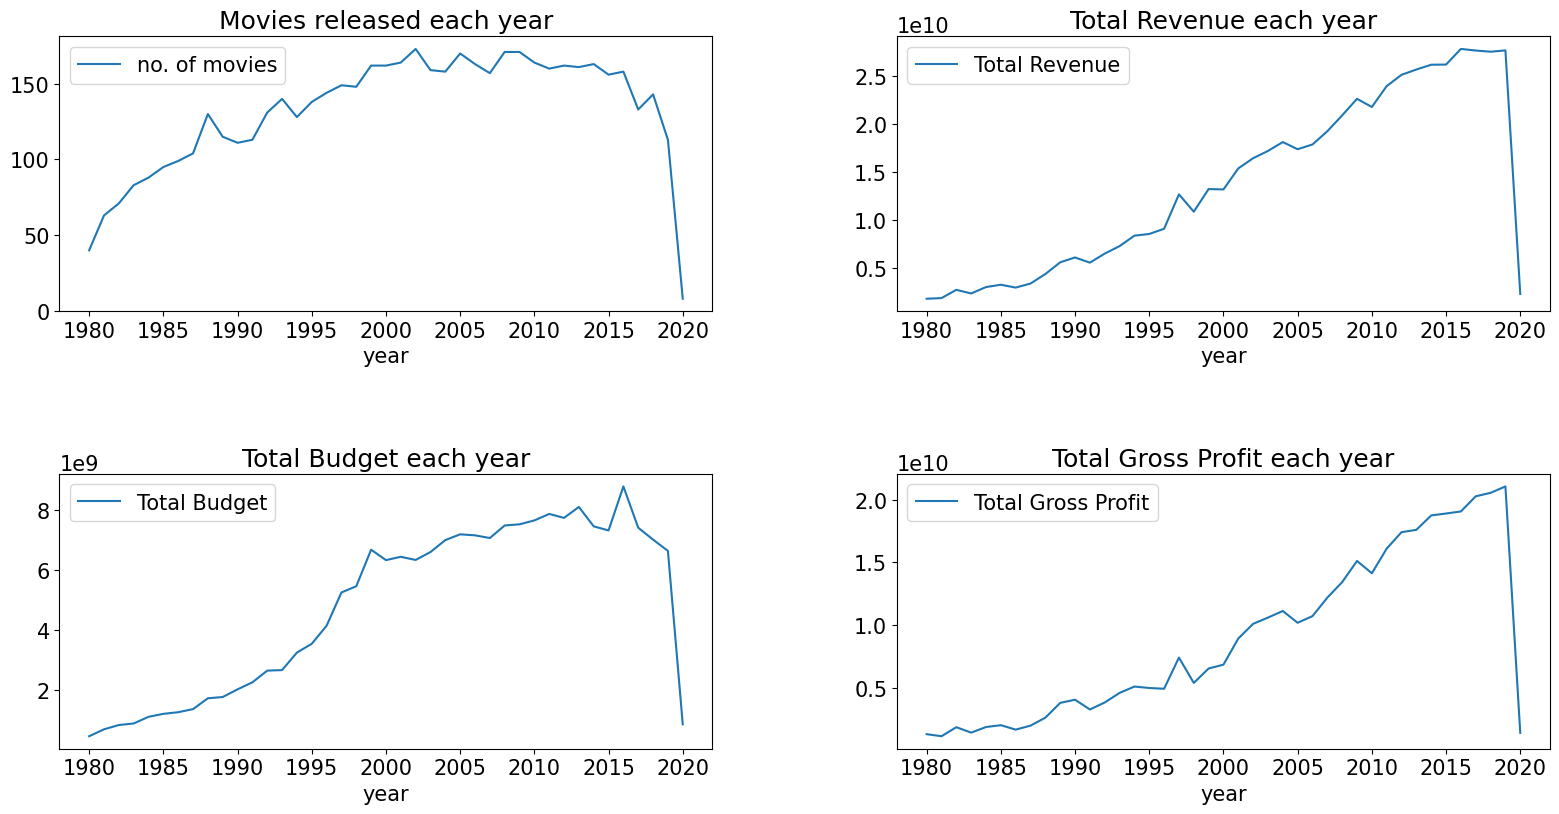

In [54]:
fig,axes=plt.subplots(2,2,figsize=(18,10))
fig.tight_layout(pad=6)
matplotlib.rcParams['font.size']=15
growth_df.plot(ax=axes[0,0],kind='line',x='year',y='no. of movies')
axes[0,0].set_title('Movies released each year')
revenue_df.plot(ax=axes[0,1],kind='line',x='year',y='Total Revenue')
axes[0,1].set_title('Total Revenue each year')
budget_df.plot(ax=axes[1,0],kind='line',x='year',y='Total Budget')
axes[1,0].set_title('Total Budget each year')
gross_profit_df.plot(ax=axes[1,1],kind='line',x='year',y='Total Gross Profit')
axes[1,1].set_title('Total Gross Profit each year');

**Takeaways**

- The movie market size has a good groth rate in these 41 years.
- The total budget and number of movies has seen less growth after 2012, one reason can we the growth of online platform like netflix the concept of web series, short movies abd other sources of content but still the revenue and gross profit has increased which means the consumer base has still increased or the ticket size has been increases due to inflation.
- There seems to an very unusal drop in year 2020 in every aspect be it revenue or no. of movies the drop is not hard to explain id we look back in the year 2020 the coronavirus pandamic happened the whole world was under lockdown so it was not possible to make any movies.

**Rating and Score**

''

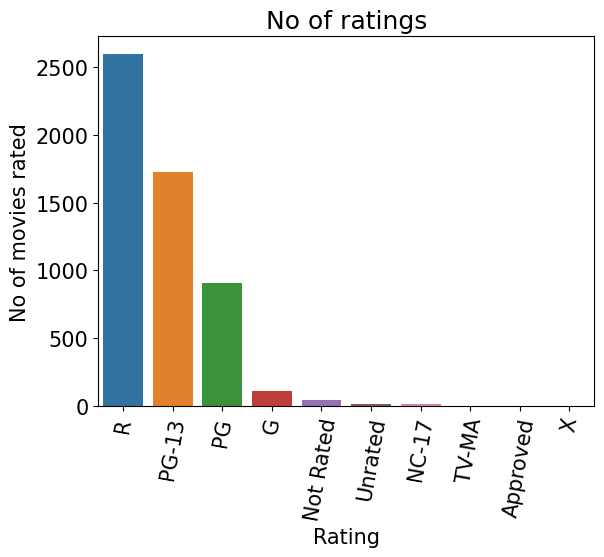

In [30]:
sns.countplot(x='rating',data=movies_df,order=movies_df['rating'].value_counts().index)
plt.xticks(rotation=80)
plt.title('No of ratings')
plt.xlabel('Rating')
plt.ylabel('No of movies rated')
;

- The rating used for maximum movies  is R followed by PG-13 and PG rating.
- There are ratings such as G, NC-17, TV-MA ,Approved and X which has rated very few number of movies.
- Some movies hasn't be rated.

In [31]:
avg_votes_df= movies_df.groupby(by='rating',as_index=False)['votes'].mean().sort_values(by='votes',ascending=False).head()
avg_votes_df

,rating,votes
5,PG-13,142236.272412
1,G,130564.549550
6,R,108017.058529
4,PG,86761.829107
9,X,83000.000000


''

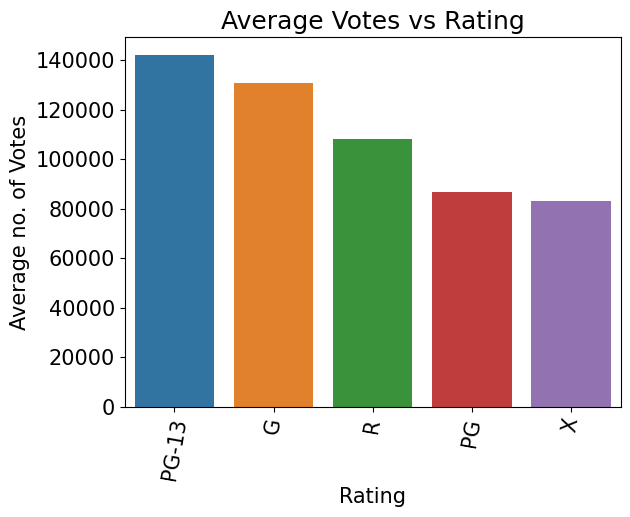

In [32]:
sns.barplot(x='rating',y='votes' ,data=avg_votes_df)
plt.xticks(rotation=80)
plt.title('Average Votes vs Rating')
plt.xlabel('Rating')
plt.ylabel('Average no. of Votes')
plt.rcParams['figure.figsize']=(4,4)
;

- The higher number of votes indicates a better score as the score has been derived from a large userbase.
- The best rating can be considered of PG-13.
- Top 5 ratings are PG-13, G, R, PG and X.

In [33]:
score_df= movies_df.groupby(by='genre',as_index=False)['score'].mean().sort_values(by='score',ascending=False)
score_df.head()

,genre,score
3,Biography,7.088103
6,Drama,6.721437
2,Animation,6.690614
5,Crime,6.689223
7,Family,6.675000


''

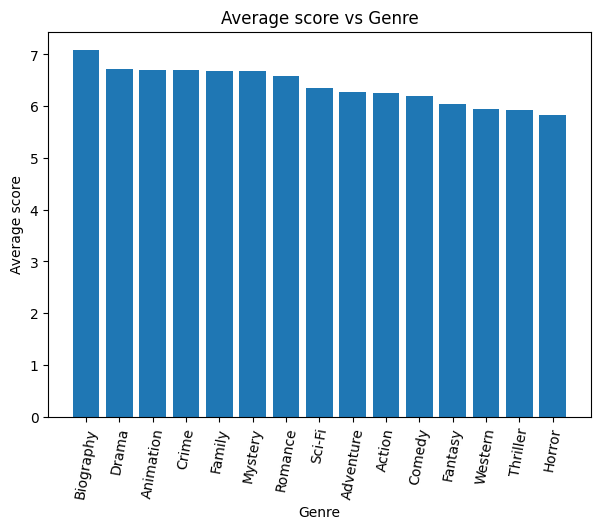

In [57]:
plt.bar(x='genre',height='score',data=score_df)
plt.xticks(rotation=80)
plt.rcParams['figure.figsize']=(7,5)
plt.xlabel('Genre')
plt.ylabel('Average score')
plt.title('Average score vs Genre')
plt.rcParams['font.size']=10
;

- All of the genres have average rating between 6 and 7 only Biography have average rating above 7.
- There is no big varience, all of the genres are performing decent and in an average range.

**Correlation analysis**

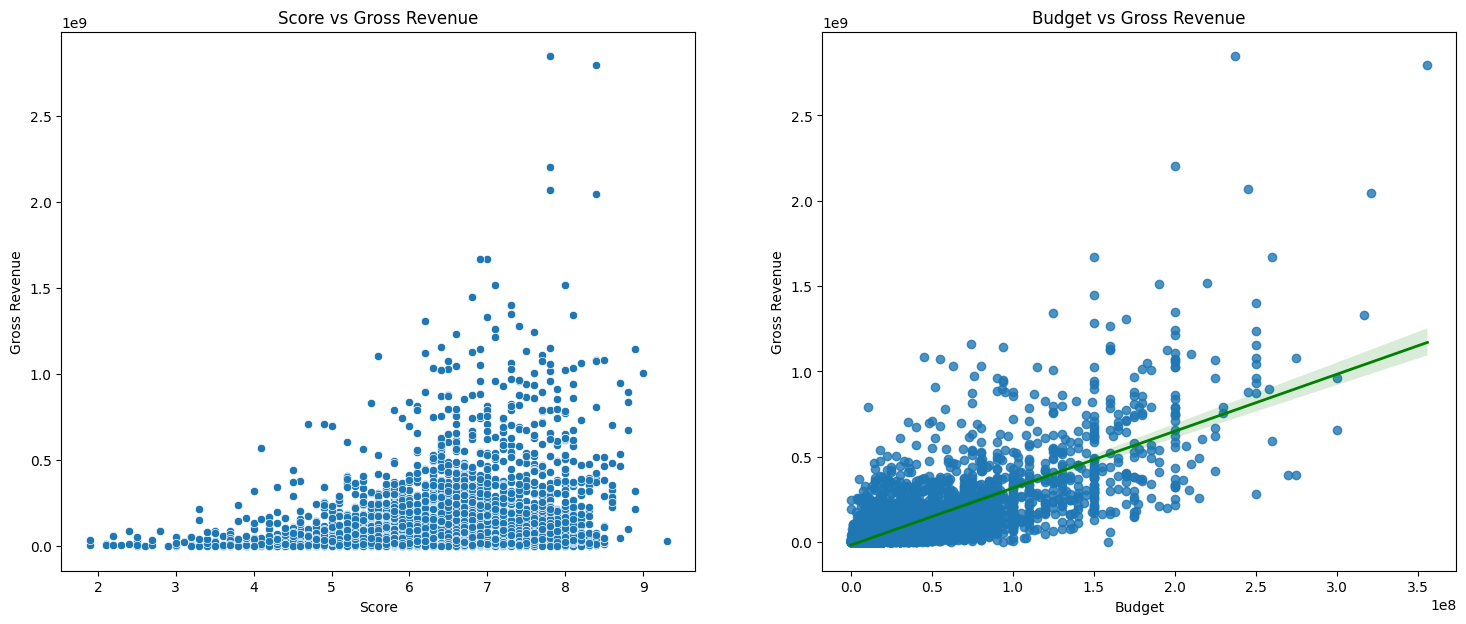

In [59]:
fig,axes=plt.subplots(1,2,figsize=(18,7))
sns.scatterplot(ax=axes[0],data=movies_df,x='score',y=('gross'))
axes[0].set_title('Score vs Gross Revenue')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Gross Revenue')
sns.regplot(data=movies_df,x='budget',y=('gross'),line_kws={'lw':2,'color':'green'})
axes[1].set_title('Budget vs Gross Revenue')
axes[1].set_xlabel('Budget')
axes[1].set_ylabel('Gross Revenue');

- High scored movies generates more gross revenue that is obvious because more the people like the movie more people will watch the movie.
- There are some which has very good rating but didn't performed very well on screens.
- The movies with higher budget makes higher gross revenue,the reason is the hiher buget must have stars with more brand value and aslo the quality of movie must be high.

**Company and Stars**

- First we need to import the libraries required to make a word cloud which we will need in the analysis.

In [36]:
import wordcloud
from wordcloud import WordCloud

In [37]:
stars_df=movies_df['star'].value_counts()
stars_df.head()

star
Nicolas Cage      40
Tom Hanks         38
Robert De Niro    38
Bruce Willis      34
Tom Cruise        33
Name: count, dtype: int64

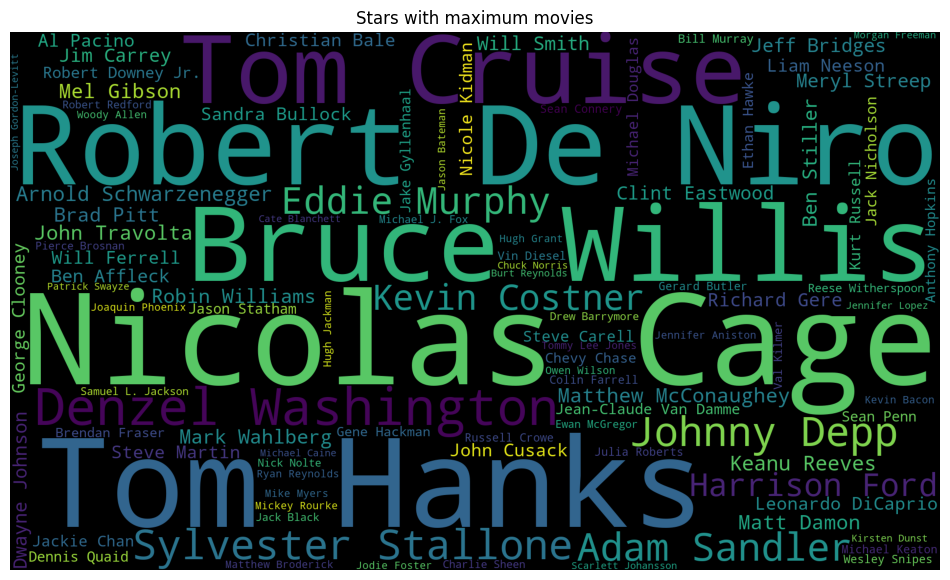

In [38]:
plt.subplots(figsize=(12,8))
plt.title('Stars with maximum movies')
wordcloud=WordCloud( width=1900, height=1100 ,background_color='black',max_words=100).generate_from_frequencies(stars_df)
plt.imshow(wordcloud)
plt.axis('off');

**The above image contains names of stars in the movies, the size of the name depends on the number of movies done by the star.Top 100 stars arranged according to the number of movies they have done are shown in the image.**
- Nicolus cage have done max movies.
- Secound highest number of movies are done by Tom Hanks and Robert De Niro.
- Third highest number of movies are done by Bruce Willis.

In [39]:
company_df=movies_df['company'].value_counts()
company_df.head()

company
Universal Pictures       330
Columbia Pictures        302
Warner Bros.             298
Paramount Pictures       279
Twentieth Century Fox    209
Name: count, dtype: int64

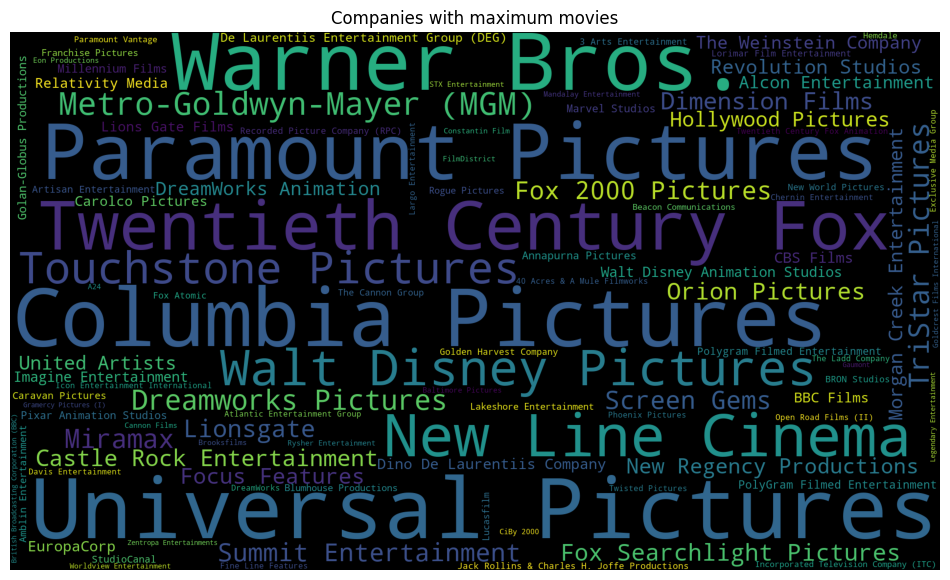

In [40]:
plt.subplots(figsize=(12,8))
plt.title('Companies with maximum movies')
wordcloud=WordCloud( width=1900, height=1100 ,background_color='black',max_words=100).generate_from_frequencies(company_df)
plt.imshow(wordcloud)
plt.axis('off');

**Top 100 companies which has made maximum movies,the greater the size the more the number of movies company has made.**
- Universal movies has made 330 movies which is max out of all.
- Columbia Pictures had made secound highest number of movies.
- Warner Bros. has made third highest number of movies.

## Questions and Answers

In this section, we embark on a quest to find answers to intriguing questions that delve into the depths of movie data. Through meticulous examination and visualization of the data, we aim to uncover trends, patterns, and correlations that lie beneath the surface.We analysise and try to find the reason which determies a movies success.

#### Q1: What is the distribution of movie budgets across different genres?

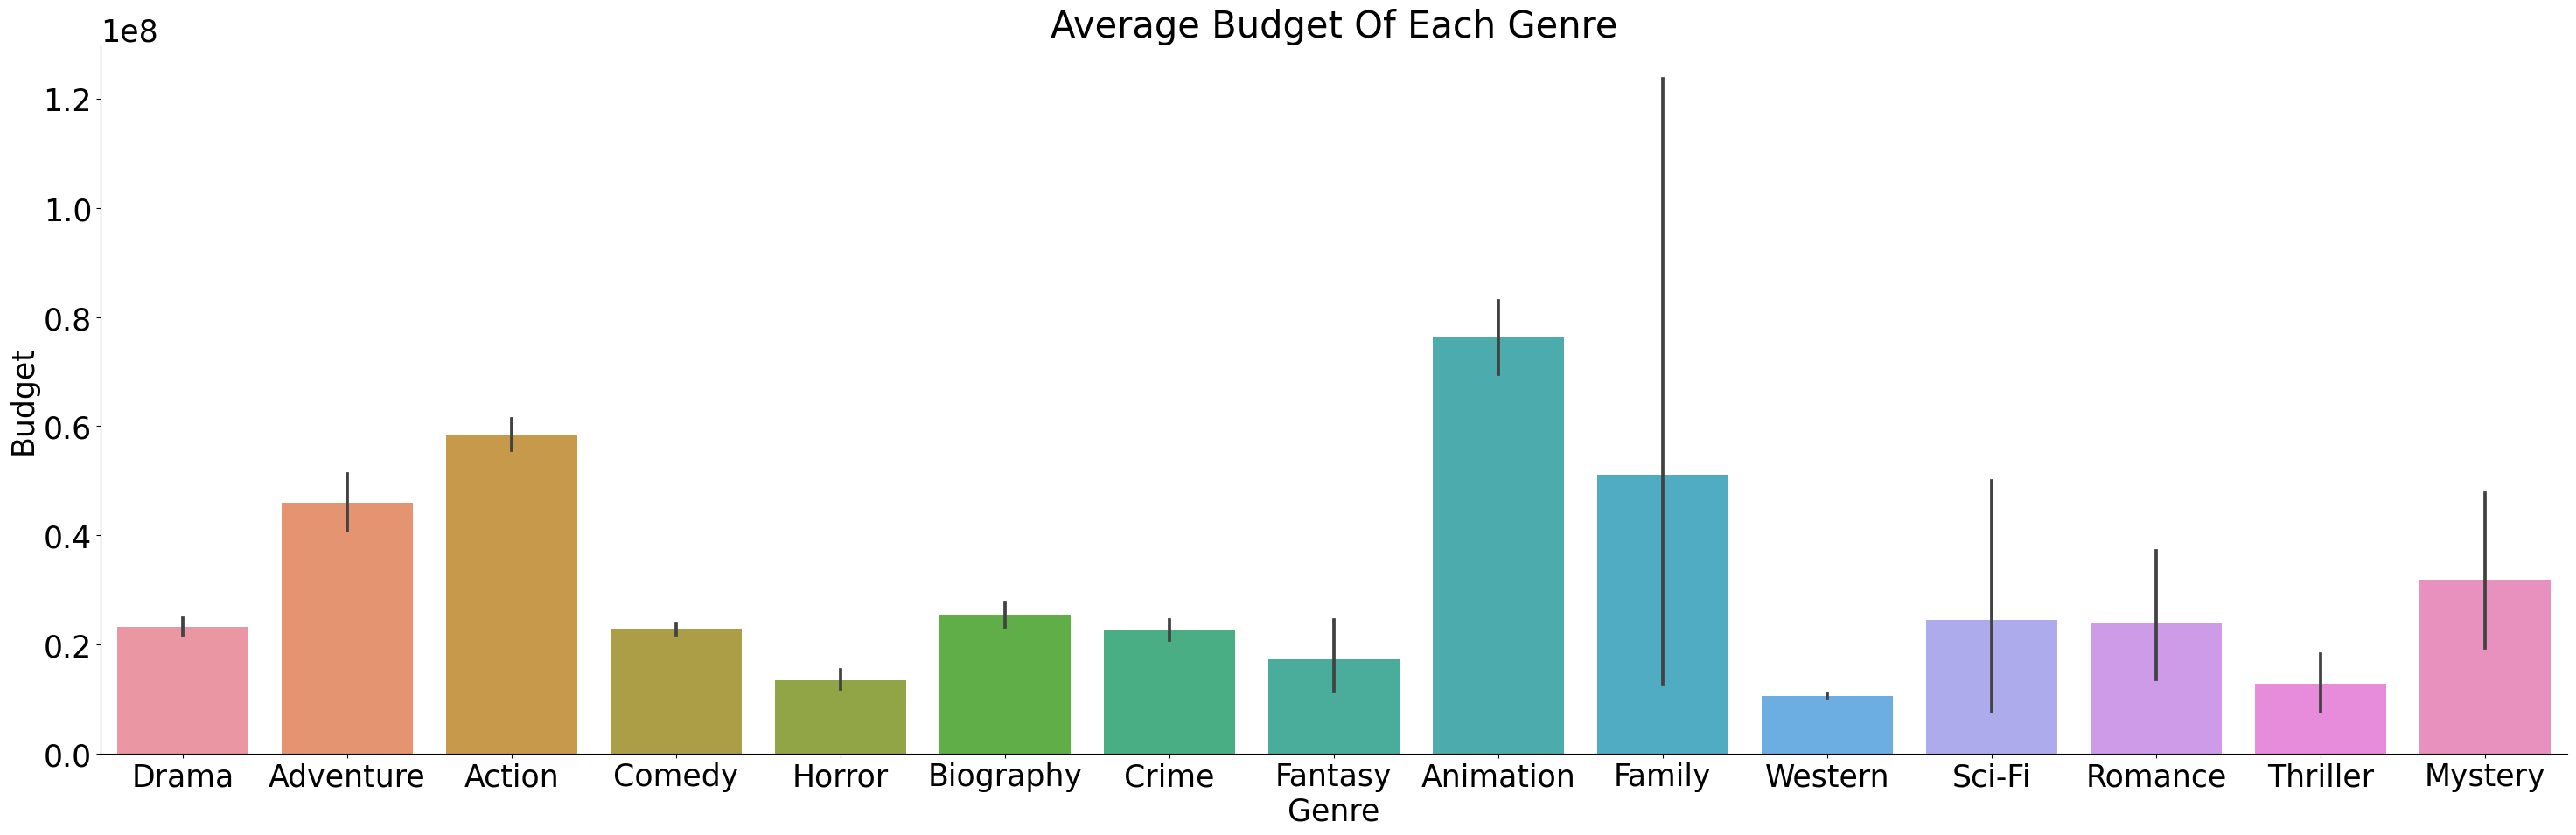

In [61]:
sns.catplot(x='genre', y='budget', kind='bar', data=movies_df, height=10, aspect=3)
plt.xlabel('Genre')
plt.ylabel('Budget')
plt.title('Average Budget Of Each Genre')
plt.rcParams['font.size']=25

**Inferences**

- Animation movies needs most amount of bugdet. Animation is a technology driven industry so it can be the reason for such high budget.
- The secound highest budget is need for movies of family genre. One thing to not about family genere is that it has very high deviation so it is difficult to predict the budget. Also,there sre very less movies of family genere so it is difficult to make any assumption about the average budget.
- Action and Adventure are also need a good budget.
- Horror, Western and Thriller are the genres that requires the least amount of budget.


#### Q2: Who are the most successful movie directors in terms of getting maximun profit?

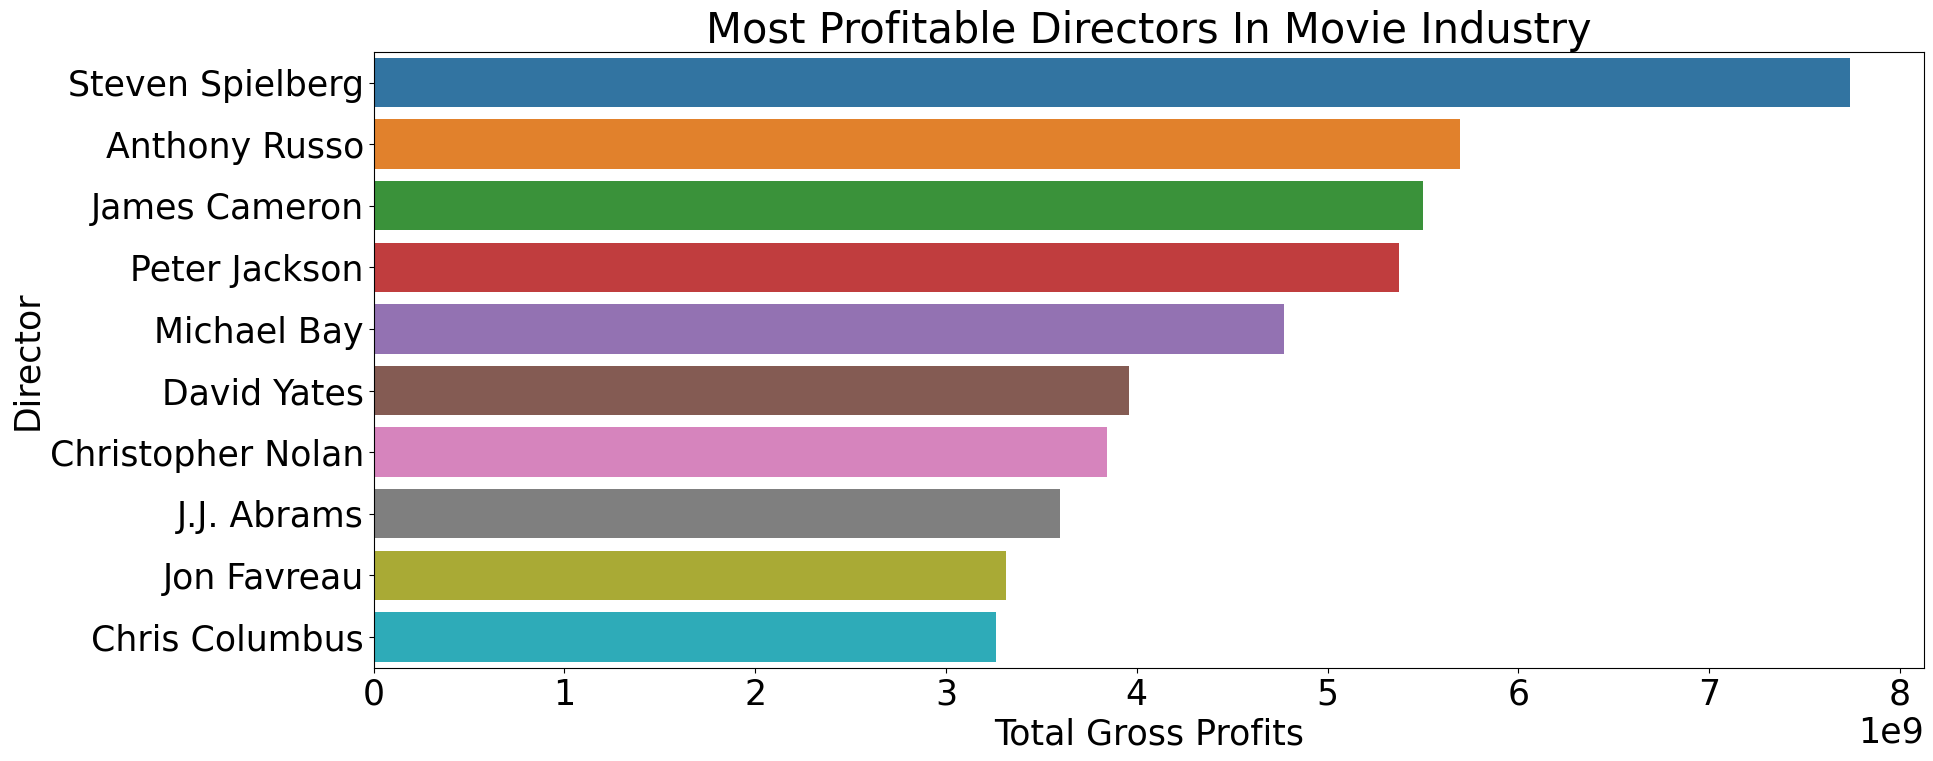

In [42]:
director_df=movies_df.groupby('director')['gross_profit'].sum().reset_index().sort_values(by='gross_profit',ascending=False).head(10)
plt.figure(figsize=(20,8))
sns.barplot(y='director',x='gross_profit',data=director_df)
plt.ylabel('Director')
plt.xlabel('Total Gross Profits')
plt.title('Most Profitable Directors In Movie Industry');


**Inferences**
- Steven Spielberg made the maximum total gross profit.The prodit made is 7 billion 737 million.
- The second most profitable director is Anthony Russo with a total gross profit of 5 billion 639 million.
- The third most profitable director is James Cameron with a total gross profit of 5 billion 499 million.

#### Q3: Anyone investing in making movies has a clear objective of getting a maximum return on their investment.Which were the top 5 movies that gave maximum return on investment?

Return of investement is the profit divided by investment multiplied by 100 this will give the percent return on initial investement.For this we will add a new column in the existing data that will represent the percent return.

In [43]:
movies_df['percent_return']=movies_df['gross_profit']/movies_df['budget']*100
movies_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,gross_profit,percent_return
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,27998772.0,147.361958
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,54353106.0,1207.846800
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,520375067.0,2890.972594
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,79953539.0,2284.386829
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,33846344.0,564.105733


In [44]:
roi_df=movies_df[['percent_return','name','genre']].sort_values(by='percent_return',ascending=False).head(5)
roi_df

,percent_return,name,genre
3466,1.288939e+06,Paranormal Activity,Horror
2105,4.142985e+05,The Blair Witch Project,Horror
4851,4.286441e+04,The Gallows,Horror
1156,2.905600e+04,El Mariachi,Action
3498,1.385781e+04,Once,Drama


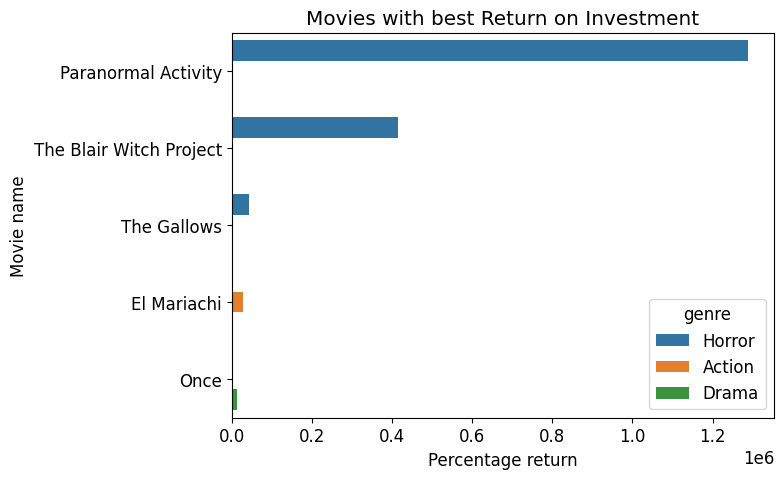

In [63]:
sns.barplot(hue='genre',x='percent_return',y='name',data=roi_df,)
plt.title('Movies with best Return on Investment')
plt.xlabel('Percentage return')
plt.ylabel('Movie name')
plt.rcParams['font.size']=12;

**Inferences**
- Paranormal Activity movie has given exceptionally high return on investment of 1 million 256 thousand percent.One reason is low cost of production as we saw before horror movies requires least budget.Also,the movies has must done wonders on screen low budget cant be the only reason.
- Top 3 return on investment movies are from horror genre.
- The low cost of production and high return of investment makes horror genre a very good investment option.
- EL Mariachi from Action genre has been 4th best ROI giving movie.
- Once from Drama is the 5th best ROI giving movie.

#### Q4: Which are the top 5 companies according to the total revenue they made and what was their total budget?

In [46]:
gross_budget_df=movies_df.groupby('company',as_index=False)[['gross','budget']].sum().sort_values(by='gross',ascending=False).head(5)
gross_budget_df

,company,gross,budget
1426,Warner Bros.,5.461096e+10,1.950330e+10
1397,Universal Pictures,5.124111e+10,1.598973e+10
452,Columbia Pictures,4.235643e+10,1.551211e+10
1108,Paramount Pictures,4.002170e+10,1.372345e+10
1382,Twentieth Century Fox,3.954257e+10,1.147460e+10


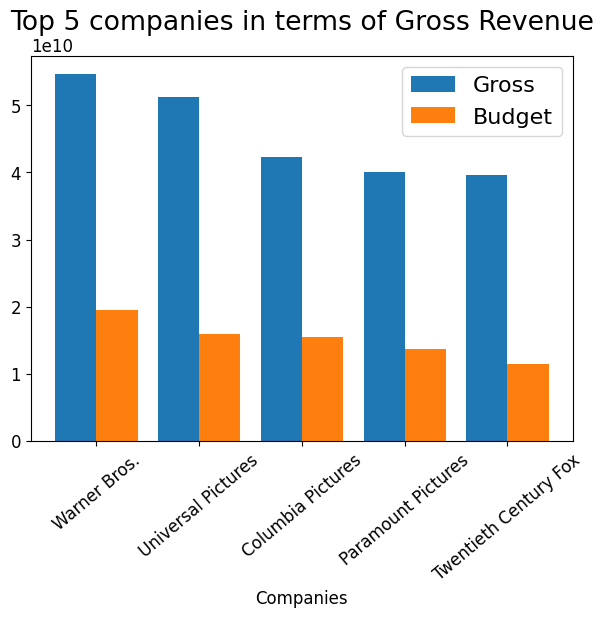

In [47]:
X=gross_budget_df['company']
X_axis=np.arange(len(gross_budget_df['company']))
plt.bar(X_axis-.2 ,gross_budget_df['gross'],0.4,label='Gross')
plt.bar(X_axis+.2 ,gross_budget_df['budget'],0.4,label='Budget')
plt.rcParams['figure.figsize']=(15,8)
plt.rcParams['font.size']=16
plt.xticks(X_axis,X,rotation=40)
plt.title('Top 5 companies in terms of Gross Revenue')
plt.xlabel('Companies')
plt.legend();

**Inferences**
- Warner Bros is the biggest company with 54 billion 610 million of gross revenue after spending a budget of 19 billion 503 million. Which is about 280% return on the budget spent.
- Universal Pictures is secound biggest company with 51 billion 241 million of gross revenue after spending a budget of 15 billion 989 million.320% return on investement.
- Columbia Pictures has got the third highest gross collection. With a Return on investment of 273%.
- Paramount Pictures has got the fourth highest gross collection. With a Return on investment of 302%.
- Twentieth Century Fox has got the fifth highest gross collection. With a Return on investment of 344%.


#### Q5: How has the average movie duration changed from years?

In [48]:
runtime_df=movies_df.groupby('year',as_index=False)['runtime'].mean()
runtime_df.head()

,year,runtime
0,1980,111.125000
1,1981,107.047619
2,1982,110.084507
3,1983,104.469880
4,1984,108.113636


In [49]:
runtime_df.describe()

,year,runtime
count,41.000000,41.000000
mean,2000.000000,108.335300
std,11.979149,2.937649
min,1980.000000,103.040404
25%,1990.000000,107.062500
50%,2000.000000,108.185185
75%,2010.000000,109.590604
max,2020.000000,119.500000


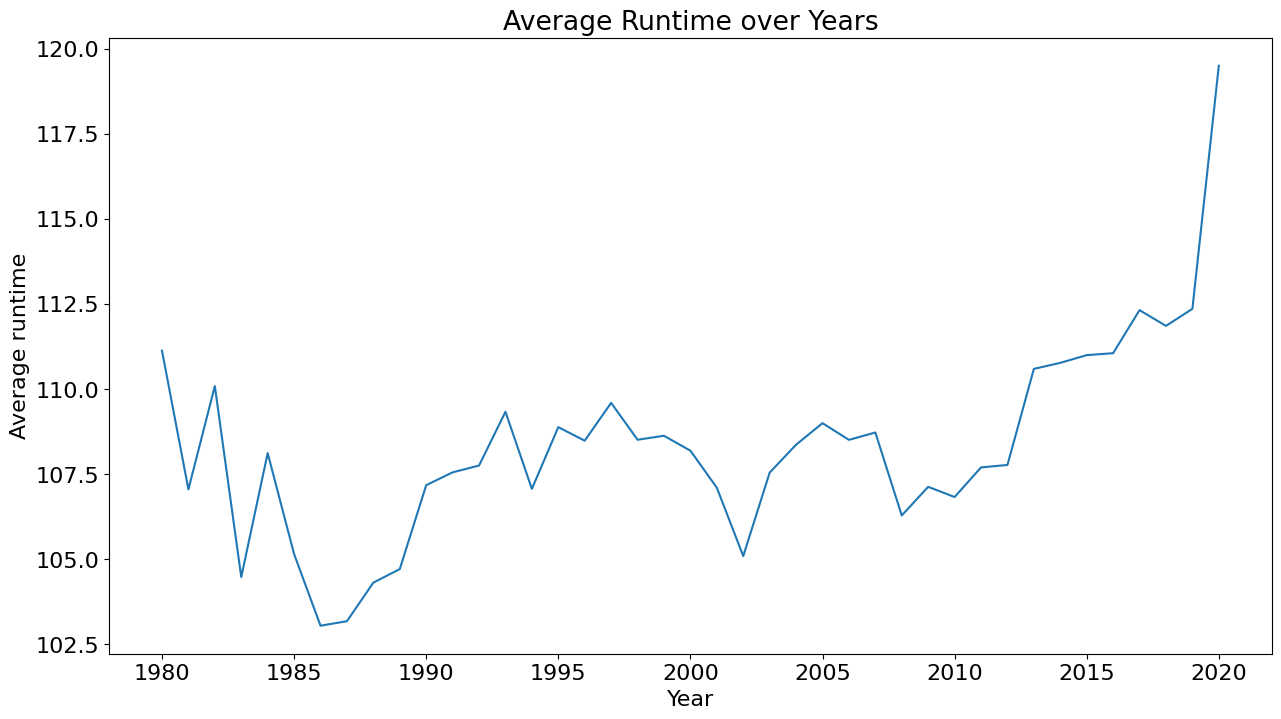

In [50]:
plt.plot('year','runtime',data=runtime_df)
plt.title('Average Runtime over Years')
plt.xlabel('Year')
plt.ylabel('Average runtime');

**Inferences**
- The mean time is 118 minutes and there is a deviation of about 3 minutes.
- There is no specific pattern in the movie runtime so no conclusions can be made, the run time had been almost same over the decades.
- There seem to be an very high growth in 2020 but as we know 2020 has very few movies due to lockdown and hence we can see the average as an general trend.

#### Q6: Which genres has given maximum mean gross profit in United States?

In [51]:
genre_profit_df=movies_df[movies_df['country']=='United States'].groupby('genre',as_index=False)['gross_profit'].mean()
genre_profit_df=genre_profit_df.sort_values(by='gross_profit',ascending=False).head(5)
genre_profit_df

,genre,gross_profit
7,Family,4.674581e+08
2,Animation,2.481460e+08
0,Action,1.145130e+08
10,Mystery,1.111030e+08
1,Adventure,7.110426e+07


''

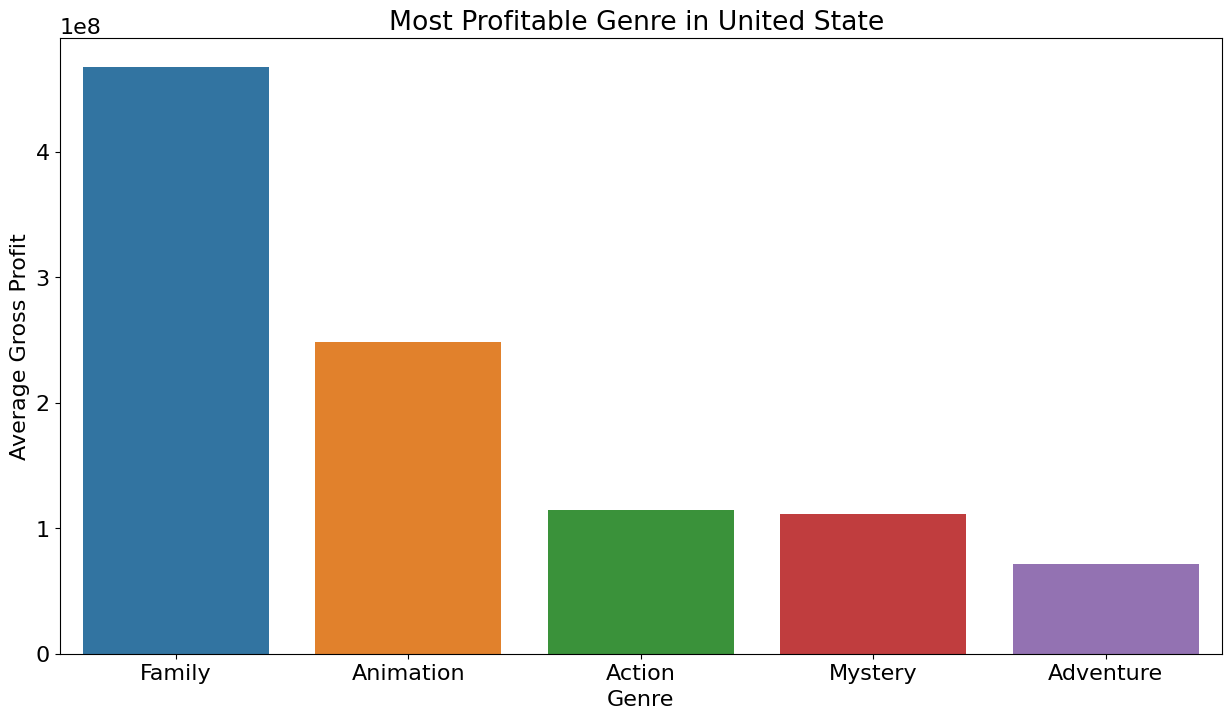

In [52]:
sns.barplot(data=genre_profit_df,x='genre',y='gross_profit')
plt.title('Most Profitable Genre in United State ')
plt.xlabel('Genre')
plt.ylabel('Average Gross Profit')
plt.rcParams['figure.figsize']=(9,5)
;

**Inferences**
- In United State the highest average gross profit has been in the family genre movies.
- The secound highest gross profit is in Animation genre.

## Summary

**Summary of inferences drawn**
- We have the data from 1980 to 2020 and the movie indusry has grew since then ,in terms of budget, movies produced and revenue collected.
- The data collected contain 50 countries but United States has very high percentage in the data base.
- There are 15 genre of movies.
- R is the biggest rating.PG-13 is the second highest rating but it can be viewed as most reliable as it uses maximum no. of votes.
- Most of the genre has rating in between six to seven.
- Score and Budget have direct relation with gross collection.
- Nicolus cage is the biggest star in terms of number of movies.
- Universal movies has the highest movies.
- Animation movies need max budget and horror are least costly.
- Horror has highest return of investment top three movies in terms of return of investment are from horror genre.
- Steven Spielberg is the most profitable director of the movie indusrty.
- Warner Bros is the biggest company with 54 billion 610 million of gross revenue after spending a budget of 19 billion 503 million. Which is a gross profit of 35 billion 107 million.
- Average runtime has been almost same over the decades no major fluctuations.
- Family genre has been most profitable in United States.

## Conclusions and Inferences

Conclusion:

The Exploratory Data Analysis (EDA) on movies data spanning from 1980 to 2020 has provided valuable insights into various aspects of the movie industry. The industry has witnessed significant growth over the years, with increasing budgets, movie production, and revenue collection. The United States plays a dominant role in the dataset, contributing to a substantial portion of the movies analyzed.

Key Inferences:

1. Movie Industry Growth: The steady increase in budgets, movies produced, and revenue collected indicates the growing popularity and profitability of the movie industry over the years.

2. Influence of the United States: The prevalence of movies from the United States in the dataset suggests the country's significant influence on the global movie market.

3. Genre and Ratings: PG-13 movies, while being the second-highest rated, can be considered more reliable due to the high number of votes they receive. Most genres have ratings falling in the range of six to seven, indicating a general level of audience appreciation.

4. Budget and Gross Collection: There is a direct relationship between the budget allocated to a movie and its gross collection. Higher budget movies tend to generate greater revenue, emphasizing the importance of investments in the filmmaking process.

5. Star Power: Nicolus Cage stands out as the most prolific actor in terms of the number of movies he has been a part of, suggesting his strong presence and popularity in the industry.

6. Studio Productions: Universal movies hold the record for the highest number of productions, indicating the studio's active involvement in the film industry.

7. Genre Economics: Animation movies require substantial budgets, while horror movies tend to be more cost-effective. Horror movies have shown the highest return on investment, making them an economically attractive genre for filmmakers.

8. Profitable Director and Production Company: Steven Spielberg emerges as the most profitable director, showcasing his impact on the success of movies. Warner Bros stands out as the biggest production company, generating significant gross revenue after spending on movie budgets.

9. Runtime Stability: The average runtime of movies has remained relatively stable over the decades, with no significant fluctuations observed.

10. Profitable Genre in the United States: Family genre movies have proven to be the most profitable in the United States, emphasizing the demand for family-oriented content in the country.

In conclusion, the EDA on movies data has provided valuable insights into the growth and dynamics of the movie industry. Filmmakers can use these findings to make informed decisions about budget allocation, genre selection, and audience targeting, leading to more successful and profitable movie productions.

## Future Work and References

**Future Work:**
- Get latest data and analyse how movie industry grew after the lockdown.
- Analyse the OTT platform data how are these two industries doing after lockdown.As OTT platforms grew during lock down. Make a comparision between both industries growth rate and revenue.
- Collect data from all over the world as this data had only had 50 countries and a more than 80% of movies from United State
- I would like to adjust the revenue of old movies with inflation and make a better analysis.
- And there are some genre which are underrepresented  so collect more data about that and make further analysis.
- With the help of machine learning, make an movie recommendation system.

**References:**
1. Matplotlib documentation: https://matplotlib.org/stable/gallery/
2. Seaborn documentation: https://seaborn.pydata.org/tutorial.html
3. Pandas documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
4. Numpy documentation:https://numpy.org/doc/
5. Opendatasets Library:https://github.com/JovianHQ/opendatasets

Have a nice day:) !